 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns = pd.read_csv( Path('Resources/whale_returns.csv'),index_col='Date',parse_dates=True,infer_datetime_format=True)
whale_returns.sort_index(ascending=True,inplace=True)

In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv(Path('Resources/algo_returns.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending=True,inplace=True)

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
snp_returns = pd.read_csv(Path('Resources/sp_tsx_history.csv'),index_col='Date',parse_dates=True,infer_datetime_format=True).dropna(how='any')
snp_returns.sort_index(ascending=True,inplace=True)

In [9]:
# Check Data Types
snp_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
snp_returns[snp_returns.columns] = snp_returns[snp_returns.columns].replace('[^0-9\.-]','', regex=True).astype(float)
snp_returns.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
snp_returns = snp_returns.pct_change()

In [12]:
# Drop nulls
snp_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
snp_returns.rename(columns={'Close' : 'S&P TSX'},inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whale_returns,algo_returns,snp_returns], axis='columns', join='inner')
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for all portfolios'}, xlabel='Date'>

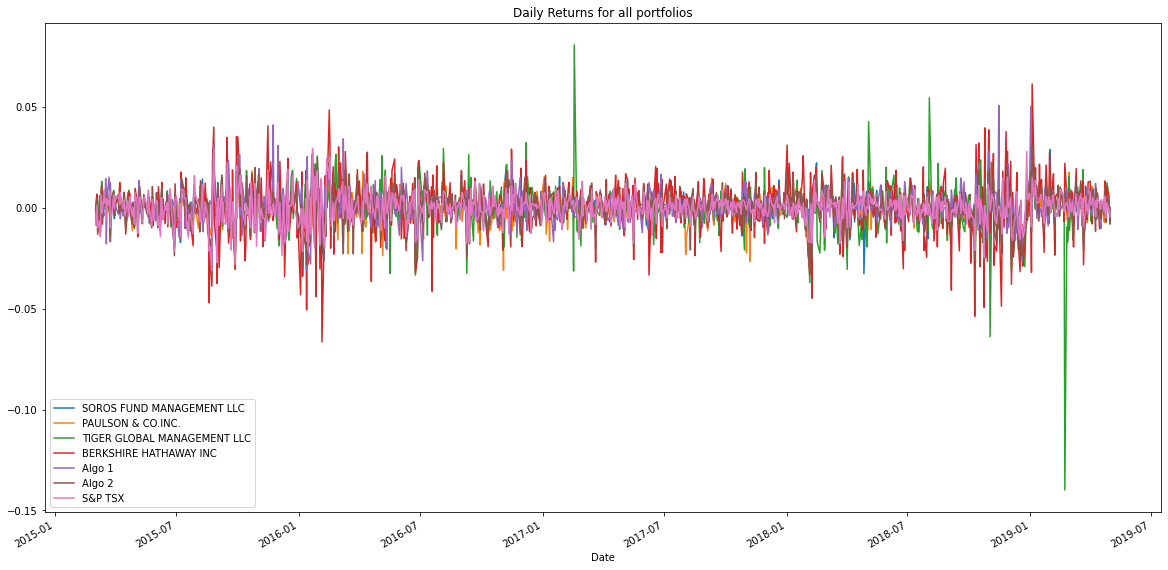

In [15]:
# Plot daily returns of all portfolios
all_daily_returns.plot(figsize=(20,10),title='Daily Returns for all portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for all portfolios'}, xlabel='Date'>

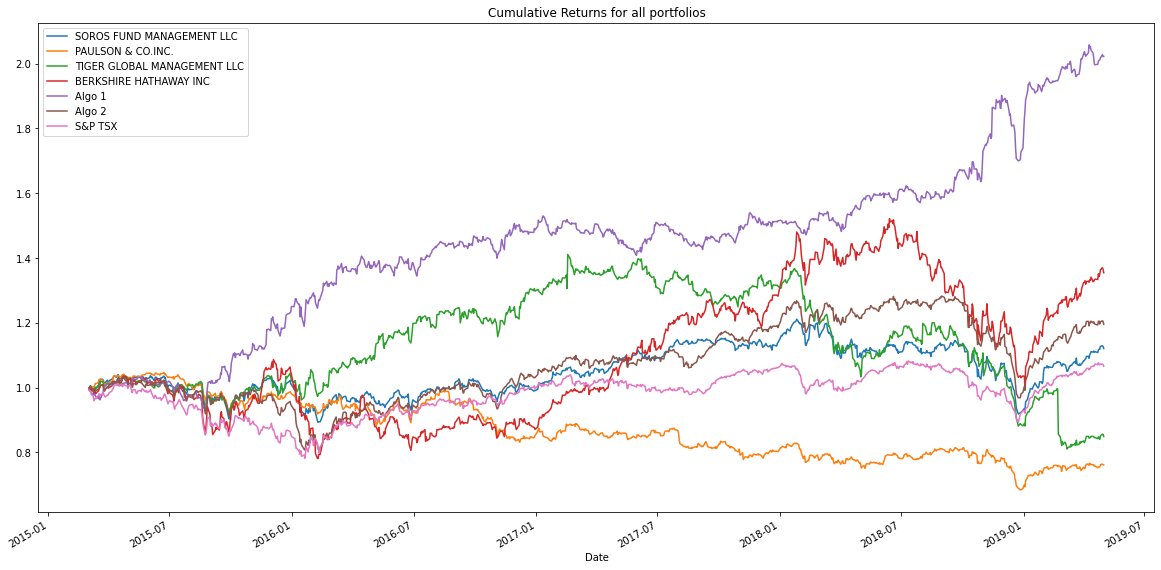

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns for all portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


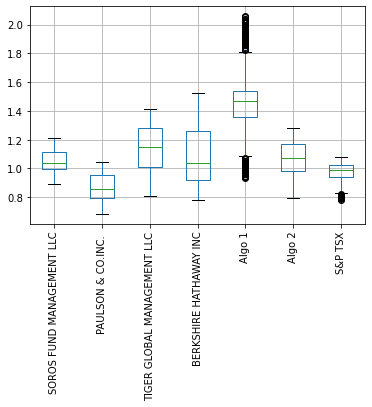

In [17]:
# Box plot to visually show risk
cumulative_returns.boxplot().tick_params(
    axis='x',
    labelrotation=90)

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_daily_std = all_daily_returns.std()
all_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Determine which portfolios are riskier than the S&P TSX 60
risky_portfolios = all_daily_std > all_daily_std['S&P TSX']
print('List of portfolios that are riskier than the S&P TSX 60 :')
for s in risky_portfolios[risky_portfolios].index:
    print(s)


List of portfolios that are riskier than the S&P TSX 60 :
SOROS FUND MANAGEMENT LLC
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation for all portfolios for a 21-day window'}, xlabel='Date'>

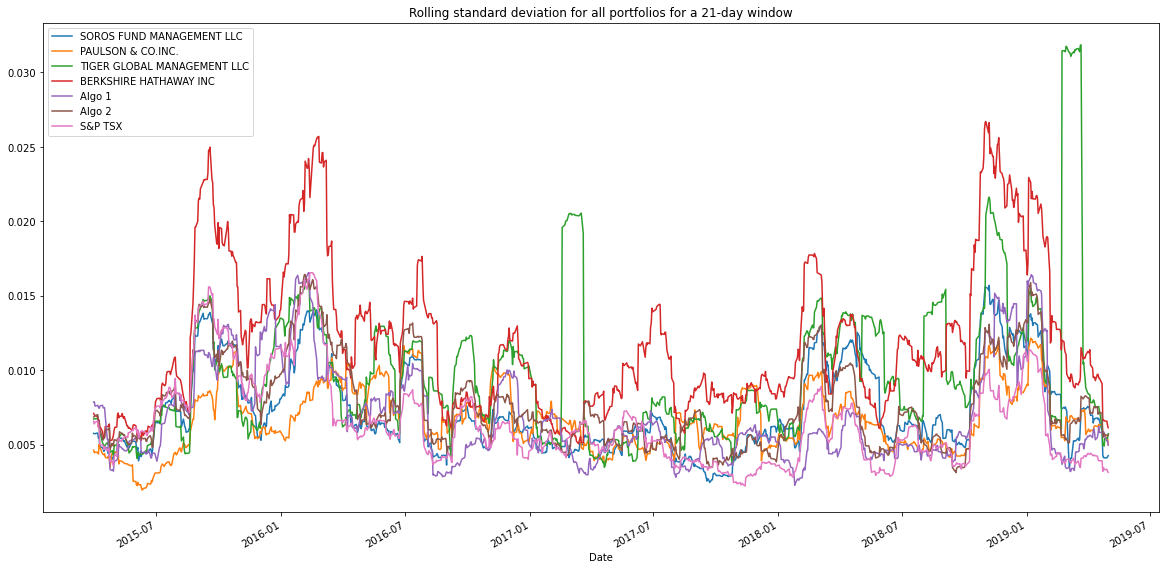

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_std_21 = all_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
daily_std_21.plot(title='Rolling standard deviation for all portfolios for a 21-day window',figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

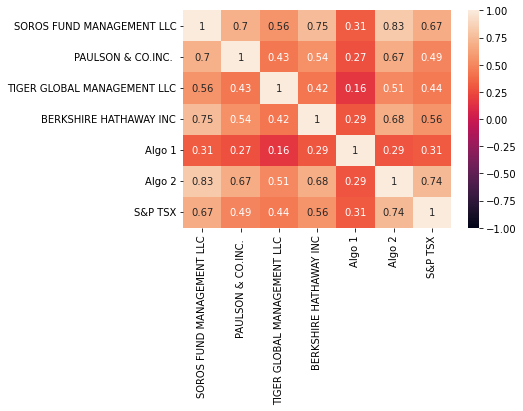

In [22]:
# Calculate the correlation
correlation_matrix = all_daily_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC Returns vs. S&P TSX Returns'}, xlabel='Date'>

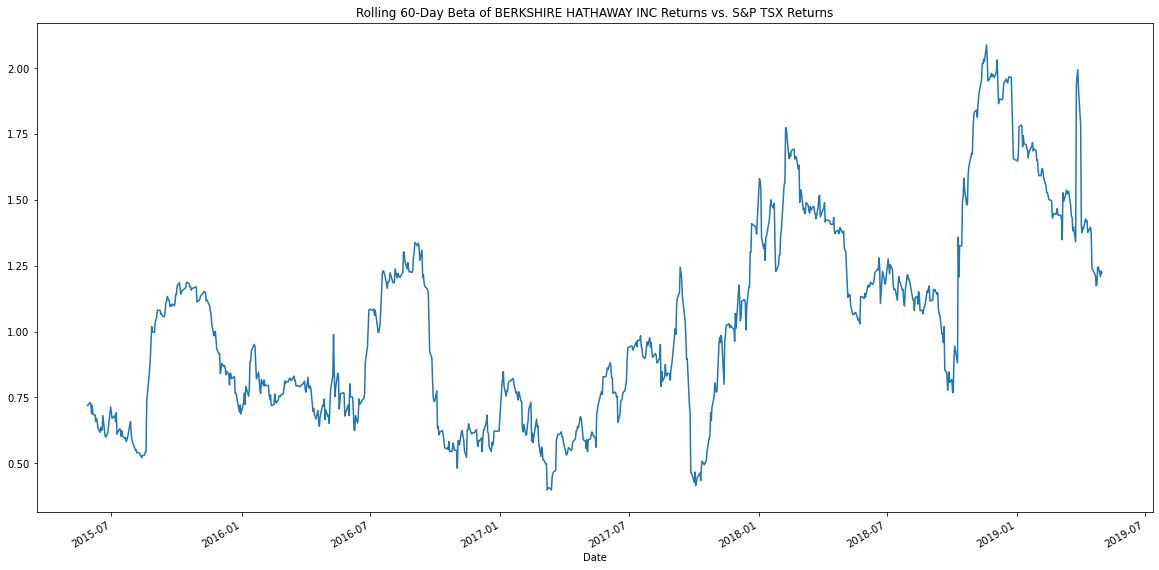

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_daily_returns['S&P TSX'])
# Calculate variance of S&P TSX
rolling_variance = all_daily_returns['S&P TSX'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC Returns vs. S&P TSX Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
all_daily_std.ewm(halflife=21).mean()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.007398
TIGER GLOBAL MANAGEMENT LLC    0.008598
BERKSHIRE HATHAWAY INC         0.009708
Algo 1                         0.009256
Algo 2                         0.009088
S&P TSX                        0.008765
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
annual_sharpe = (all_daily_returns.mean() * 252) / (all_daily_returns.std()* np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

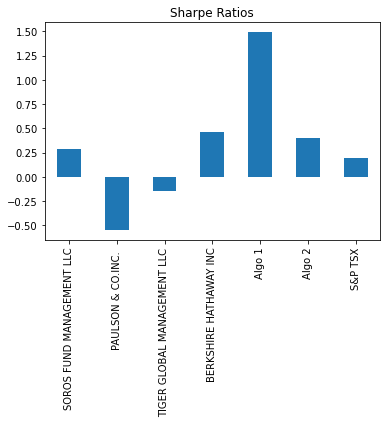

In [26]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Looking at the Sharpe Ratios, ***Alog 1*** has clearly outperform both S&P TSX 60 and all the whales portfolios. 

While ***Algo 2*** outperform S&P TSX 60 & whale portfolios except BERKSHIRE HATHAWAY INC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
goog_returns = pd.read_csv( Path('Resources/google.csv'),index_col='Date',parse_dates=True,infer_datetime_format=True)
goog_returns.rename(columns = {'Close':'GOOG'},inplace = True)

In [28]:
# Reading data from 2nd stock
msft_returns = pd.read_csv(Path('Resources/msft.csv'),index_col='Date',parse_dates=True,infer_datetime_format=True)
msft_returns.rename(columns = {'Close':'MSFT'},inplace = True)

In [29]:
# Reading data from 3rd stock
twtr_returns = pd.read_csv(Path('Resources/twtr.csv'),index_col='Date',parse_dates=True,infer_datetime_format=True)
twtr_returns.rename(columns = {'Close':'TWTR'},inplace = True)

In [30]:
# Combine all stocks in a single DataFrame
all_data = pd.concat(
    [goog_returns,msft_returns,twtr_returns],
    axis='columns',
    join='inner')
all_data.sort_index(ascending=True,inplace=True)

In [31]:
# Reset Date index
all_data.index = all_data.index.normalize()
all_data

,GOOG,MSFT,TWTR
Date,,,
2018-01-02,58.39,94.26,27.14
2018-01-03,53.48,92.85,32.24
2018-01-05,51.87,95.00,30.30
2018-01-06,55.98,100.79,36.65
2018-01-08,61.00,106.28,31.91
...,...,...,...
2018-12-26,51.97,100.56,28.66
2018-12-27,52.19,101.18,28.68
2018-12-28,51.85,100.39,28.43


In [32]:
# Calculate daily returns
daily_returns = all_data.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

,GOOG,MSFT,TWTR
Date,,,
2018-01-03,-0.084090,-0.014959,0.187915
2018-01-05,-0.030105,0.023156,-0.060174
2018-01-06,0.079237,0.060947,0.209571
2018-01-08,0.089675,0.054470,-0.129332
2018-01-10,-0.020164,0.087787,-0.112817


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_returns = daily_returns.dot(weights)

# Display sample data
myportfolio_returns.head()

Date
2018-01-03    0.029622
2018-01-05   -0.022374
2018-01-06    0.116585
2018-01-08    0.004938
2018-01-10   -0.015065
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
all_daily_returns = pd.concat([myportfolio_returns,all_daily_returns],axis='columns',join='inner')
all_daily_returns.rename(columns = {0:"Pragya Portfolio"}, inplace = True)
all_daily_returns

,Pragya Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.029622,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-05,-0.022374,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.004938,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-10,-0.015065,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,0.011390,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
...,...,...,...,...,...,...,...,...
2018-12-24,-0.025567,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141
2018-12-27,0.003699,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.027940
2018-12-28,-0.007680,0.001145,0.000863,-0.004019,-0.006178,0.014664,0.011664,0.004009


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_daily_returns.dropna()
all_daily_returns

,Pragya Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.029622,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-05,-0.022374,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.004938,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-10,-0.015065,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,0.011390,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
...,...,...,...,...,...,...,...,...
2018-12-24,-0.025567,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141
2018-12-27,0.003699,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.027940
2018-12-28,-0.007680,0.001145,0.000863,-0.004019,-0.006178,0.014664,0.011664,0.004009


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
annualized_std = (all_daily_returns.std()) * np.sqrt(252)
annualized_std

Pragya Portfolio               0.904808
SOROS FUND MANAGEMENT LLC      0.156628
PAULSON & CO.INC.              0.115692
TIGER GLOBAL MANAGEMENT LLC    0.187909
BERKSHIRE HATHAWAY INC         0.239495
Algo 1                         0.122319
Algo 2                         0.142177
S&P TSX                        0.107362
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling std with 21-day window for all portfolios'}, xlabel='Date'>

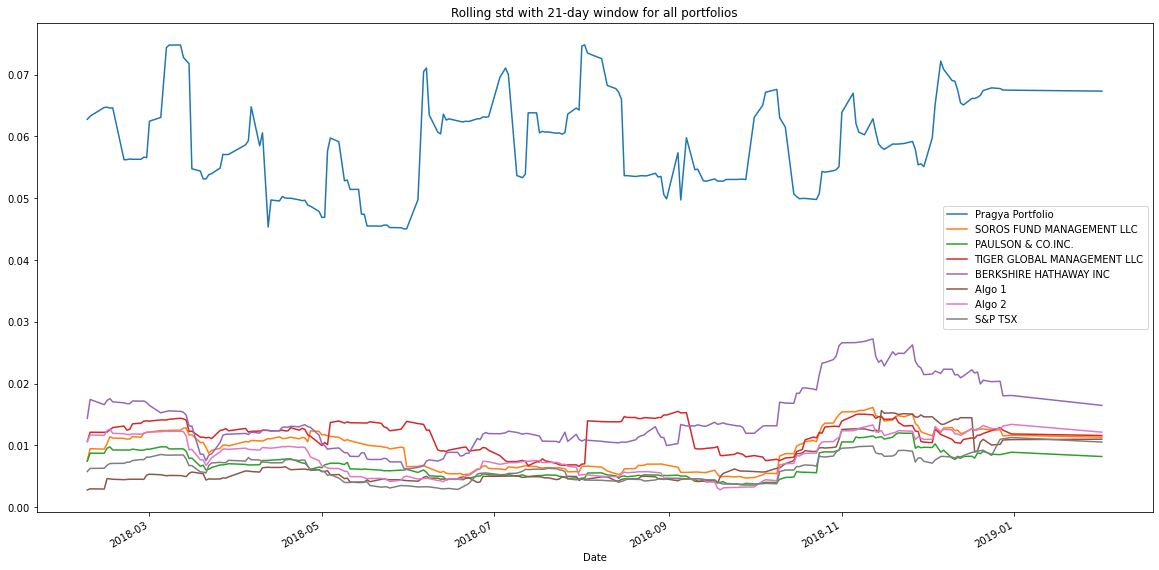

In [37]:
# Calculate rolling standard deviation
rolling_std = all_daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(title="Rolling std with 21-day window for all portfolios", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

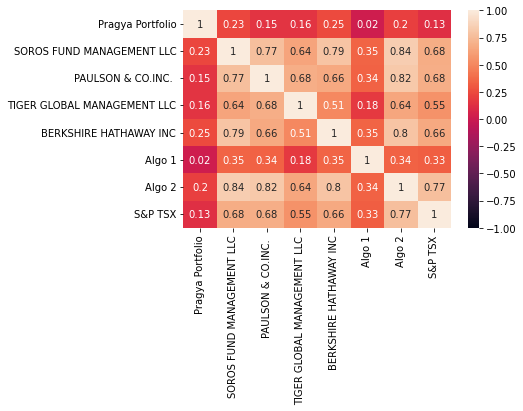

In [38]:
# Calculate and plot the correlation
correlation_matrix = all_daily_returns.corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Pragya Portfolio Returns vs. S&P TSX Returns'}, xlabel='Date'>

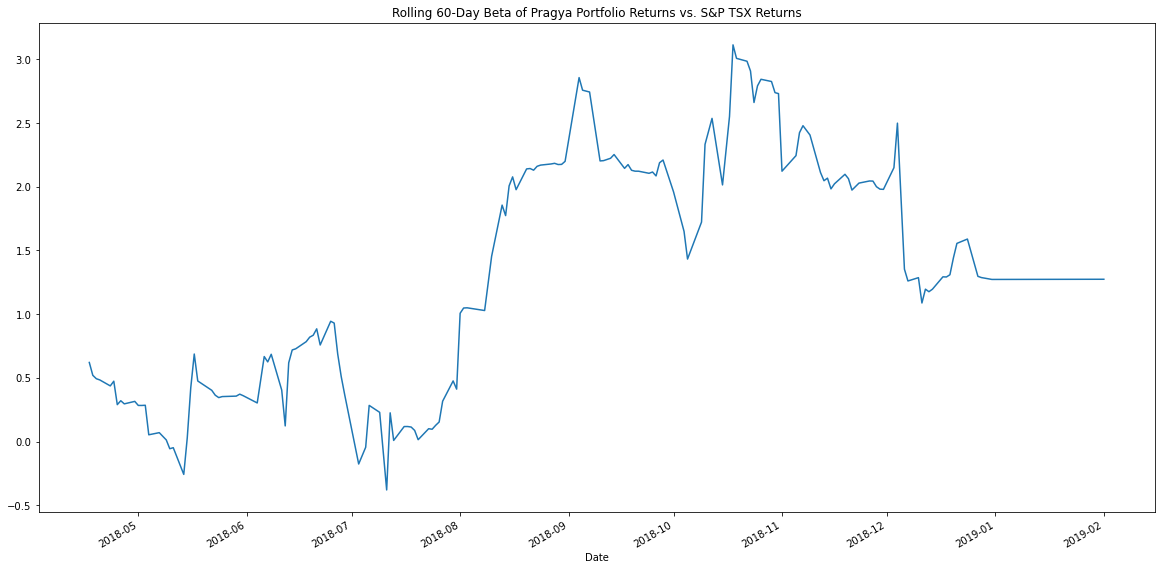

In [39]:
# Calculate and plot Beta
# Calculate covariance of Pragya Portfolio portfolio
rolling_covariance = all_daily_returns['Pragya Portfolio'].rolling(window=60).cov(all_daily_returns['S&P TSX'])
# Calculate variance of S&P TSX
rolling_variance = all_daily_returns['S&P TSX'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Pragya Portfolio Returns vs. S&P TSX Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
annual_sharpe = (all_daily_returns.mean() * 252) / annualized_std

<AxesSubplot:title={'center':'Annual Sharpe for all portfolios'}>

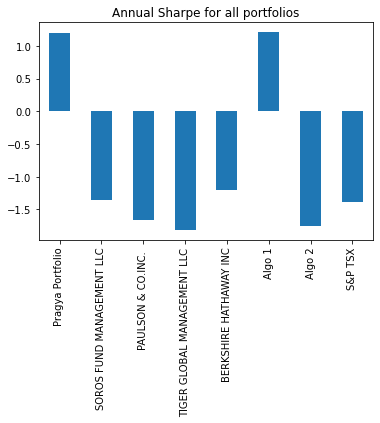

In [41]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind='bar',title='Annual Sharpe for all portfolios')

### How does your portfolio do?

My portfolio outperform market (S&P TSX) and whales portfolios, and was at power with Algo 1.

**Note** My portfolio analysis is done for the period "01/01/2018" to "03/01/2019"